# ML MAJOR PROJECT

## CLEANING DATA OF DATA

In [73]:
import datetime
import pandas as pd
import numpy as np
import math
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from pandas import DataFrame

In [75]:
train = pd.read_excel('/content/Data_Train.xlsx')
train = train.reindex(np.random.permutation(train.index))

# numpy.random.permutation() method, we can get the random samples of sequence of permutation 
#  and return sequence by using this method.

print("TRAIN SHAPE: ",train.shape)
train.info()
train.head()

TRAIN SHAPE:  (6019, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 1177 to 2863
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 611.3+ KB


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1177,Hyundai i10 Era,Jaipur,2013,46230,Petrol,Manual,First,19.81 kmpl,1086 CC,68.05 bhp,5.0,3.10
4515,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,Pune,2009,118000,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,8.0,4.50
3686,Skoda Laura Ambiente,Hyderabad,2008,122397,Diesel,Manual,First,17.5 kmpl,1896 CC,106 bhp,5.0,4.40
1839,Maruti Ertiga VDI,Delhi,2014,79870,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,5.35
3174,Hyundai Verna 1.6 SX,Kolkata,2011,34994,Diesel,Manual,First,22.32 kmpl,1582 CC,126.32 bhp,5.0,3.90


In [77]:
train.isnull().sum()
# returns the number of missing values in the data set. 

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [78]:
train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [79]:
print(train['Location'].unique())
print(train['Fuel_Type'].unique())
print(train['Transmission'].unique())
print(train['Owner_Type'].unique())

['Jaipur' 'Pune' 'Hyderabad' 'Delhi' 'Kolkata' 'Mumbai' 'Kochi'
 'Bangalore' 'Coimbatore' 'Ahmedabad' 'Chennai']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


<b>Let's Drop some Rows which contains NULL values.</b>

In [80]:
print("Shape of train data Before dropping any Row: ",train.shape)
train = train[train['Mileage'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage: ",train.shape)
train = train[train['Engine'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine : ",train.shape)
train = train[train['Power'].notna()]
print("Shape of train data After dropping Rows with NULL values in Power  : ",train.shape)
train = train[train['Seats'].notna()]
print("Shape of train data After dropping Rows with NULL values in Seats  : ",train.shape)

Shape of train data Before dropping any Row:  (6019, 12)
Shape of train data After dropping Rows with NULL values in Mileage:  (6017, 12)
Shape of train data After dropping Rows with NULL values in Engine :  (5981, 12)
Shape of train data After dropping Rows with NULL values in Power  :  (5981, 12)
Shape of train data After dropping Rows with NULL values in Seats  :  (5975, 12)


So, in total I have 5975 Rows now to work forward. I droped 44 rows.

In [81]:
train = train.reset_index(drop=True)

<b>Well after using .notna() we have many absent indexes (Eg: If row no 47 was droped then after 46 we have 48 index), so I reset the index and droping the present index.</b>

In [ ]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Audi A4 3.0 TDI Quattro,Bangalore,2014,30000,Diesel,Automatic,First,14.94 kmpl,2967 CC,241.4 bhp,5.0,24.5
1,Audi A6 2.7 TDI,Bangalore,2013,90000,Diesel,Automatic,Second,12.4 kmpl,2698 CC,179.5 bhp,5.0,22.5
2,Renault Duster 110PS Diesel RxZ Plus,Hyderabad,2013,42000,Diesel,Manual,First,19.64 kmpl,1461 CC,108.45 bhp,5.0,8.0
3,Hyundai Verna 1.6 VTVT,Kolkata,2012,24000,Petrol,Manual,Second,17.01 kmpl,1591 CC,121.3 bhp,5.0,6.2
4,Maruti Omni MPI CARGO BSIV,Kolkata,2015,23000,Petrol,Manual,First,16.8 kmpl,796 CC,34.2 bhp,5.0,1.5


<b>Let's remove the units (kmpl, km/kg, cc, bhp) from the columns(Mileage, Engine, Power) for easy computations on these columns. 
Also we will be splitting name column into two columns namely brand and model.</b>

In [84]:
for i in range(train.shape[0]):
    train.at[i, 'Brand'] = train['Name'][i].split()[0]
    train.at[i, 'Mileage'] = train['Mileage'][i].split()[0]
    train.at[i, 'Engine'] = train['Engine'][i].split()[0]
    train.at[i, 'Power'] = train['Power'][i].split()[0]
    train.at[i, 'Model']=''
    for j in np.arange(1,len(train['Name'][i].split())):
        train.at[i, 'Model']=train.at[i, 'Model'] + train['Name'][i].split()[j]
train.drop(train.columns[0], axis=1, inplace=True)


In [85]:
print(train['Brand'].unique())

['Hyundai' 'Toyota' 'Skoda' 'Maruti' 'Mahindra' 'Honda' 'Ford'
 'Mitsubishi' 'Renault' 'Nissan' 'Volkswagen' 'Audi' 'BMW' 'Mercedes-Benz'
 'Tata' 'Land' 'Volvo' 'Chevrolet' 'Fiat' 'Porsche' 'Jaguar' 'Datsun'
 'Mini' 'Jeep' 'Ambassador' 'ISUZU' 'Force' 'Smart' 'Lamborghini'
 'Bentley' 'Isuzu']


<b>Merging Isuzu and ISUZU</b>

In [86]:
train.loc[train.Brand=='Isuzu','Brand']='ISUZU'

In [87]:
train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Jaipur,2013,46230,Petrol,Manual,First,19.81,1086,68.05,5.0,3.10,Hyundai,i10Era
1,Pune,2009,118000,Diesel,Manual,First,12.8,2494,102,8.0,4.50,Toyota,Innova2.5G(Diesel)7SeaterBSIV
2,Hyderabad,2008,122397,Diesel,Manual,First,17.5,1896,106,5.0,4.40,Skoda,LauraAmbiente
3,Delhi,2014,79870,Diesel,Manual,First,20.77,1248,88.76,7.0,5.35,Maruti,ErtigaVDI
4,Kolkata,2011,34994,Diesel,Manual,First,22.32,1582,126.32,5.0,3.90,Hyundai,Verna1.6SX


<b>Bringing Company and model column to the beginning.</b>

In [88]:
col_name='Model'
first_col=train.pop(col_name)
train.insert(0,col_name,first_col)
col_name='Brand'
first_col=train.pop(col_name)
train.insert(0,col_name,first_col)

In [ ]:
train.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Audi,A43.0TDIQuattro,Bangalore,2014,30000,Diesel,Automatic,First,14.94,2967,241.4,5.0,24.5
1,Audi,A62.7TDI,Bangalore,2013,90000,Diesel,Automatic,Second,12.4,2698,179.5,5.0,22.5
2,Renault,Duster110PSDieselRxZPlus,Hyderabad,2013,42000,Diesel,Manual,First,19.64,1461,108.45,5.0,8.0
3,Hyundai,Verna1.6VTVT,Kolkata,2012,24000,Petrol,Manual,Second,17.01,1591,121.3,5.0,6.2
4,Maruti,OmniMPICARGOBSIV,Kolkata,2015,23000,Petrol,Manual,First,16.8,796,34.2,5.0,1.5


<b>Converting mileage and engine values to float</b>

In [89]:
train['Mileage'] = train['Mileage'].astype(float)
train['Engine'] = train['Engine'].astype(float)

<b> Removing rows with null power values. </b>

In [90]:
x = 'n'
count = 0
position = []
for i in range(train.shape[0]):
    if train['Power'][i]=='null':
        x = 'Y'
        count = count + 1
        position.append(i)
print(x)
print(count)
print(position)


Y
103
[153, 171, 434, 450, 451, 602, 622, 774, 873, 926, 1038, 1053, 1167, 1188, 1260, 1399, 1403, 1415, 1518, 1587, 1609, 1612, 1734, 1769, 1816, 1830, 1847, 1870, 1877, 1917, 1923, 1936, 2011, 2034, 2066, 2120, 2179, 2185, 2207, 2216, 2474, 2476, 2477, 2522, 2545, 2555, 2590, 2638, 2640, 2650, 2670, 2681, 2722, 2793, 2811, 2862, 2877, 2890, 2964, 3010, 3090, 3148, 3296, 3444, 3462, 3466, 3491, 3564, 3592, 3624, 3698, 3756, 3769, 3852, 3901, 4017, 4157, 4207, 4258, 4329, 4413, 4536, 4593, 4678, 4749, 4757, 4759, 4796, 4874, 4885, 5076, 5123, 5187, 5196, 5201, 5396, 5511, 5565, 5652, 5805, 5811, 5917, 5921]


In [91]:
train = train.drop(train.index[position])
train = train.reset_index(drop=True)

In [92]:
train.shape

(5872, 13)

In [93]:
train['Power'] = train['Power'].astype(float)
#Converting power values to float

<b>Removing the rows woth 0 mileage.</b>

In [94]:
x = 'n'
count = 0
position = []
for i in range(train.shape[0]):
    if train['Mileage'][i]==0.0:
        x = 'Y'
        count = count + 1
        position.append(i)
print(x)
print(count)
print(position)

Y
28
[363, 605, 1161, 1174, 1490, 1587, 2026, 2126, 2490, 2640, 2712, 2956, 3217, 3307, 3349, 3559, 3586, 3682, 3749, 3962, 3992, 4043, 4047, 4109, 4395, 5043, 5646, 5795]


In [95]:
train = train.drop(train.index[position])
train = train.reset_index(drop=True)

In [96]:
train.shape

(5844, 13)

In [97]:
train.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Hyundai,i10Era,Jaipur,2013,46230,Petrol,Manual,First,19.81,1086.0,68.05,5.0,3.10
1,Toyota,Innova2.5G(Diesel)7SeaterBSIV,Pune,2009,118000,Diesel,Manual,First,12.80,2494.0,102.00,8.0,4.50
2,Skoda,LauraAmbiente,Hyderabad,2008,122397,Diesel,Manual,First,17.50,1896.0,106.00,5.0,4.40
3,Maruti,ErtigaVDI,Delhi,2014,79870,Diesel,Manual,First,20.77,1248.0,88.76,7.0,5.35
4,Hyundai,Verna1.6SX,Kolkata,2011,34994,Diesel,Manual,First,22.32,1582.0,126.32,5.0,3.90


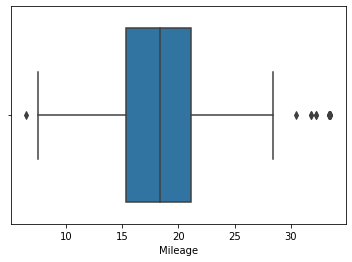

In [98]:
import seaborn as sns
sns.boxplot(x=train['Mileage'])

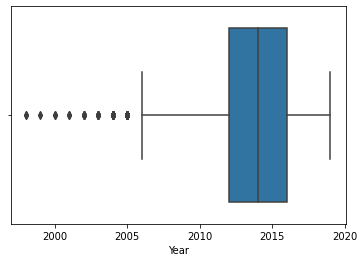

In [99]:
sns.boxplot(x=train['Year'])

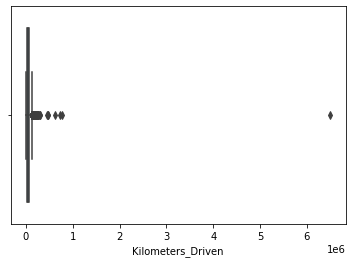

In [100]:
sns.boxplot(x=train['Kilometers_Driven'])

<b>Removing the outlier who have exceptionally high value of Kilometers driven as shown in the above plot</b>

In [101]:
x = 'n'
count = 0
position = []
for i in range(train.shape[0]):
    if train['Kilometers_Driven'][i]>5000000:
        x = 'Y'
        count = count + 1
        position.append(i)
print(x)
print(count)
print(position)

Y
1
[259]


In [102]:
train = train.drop(train.index[position])
train = train.reset_index(drop=True)

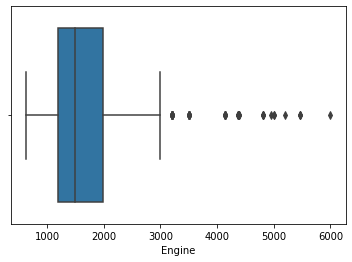

In [103]:
sns.boxplot(x=train['Engine'])

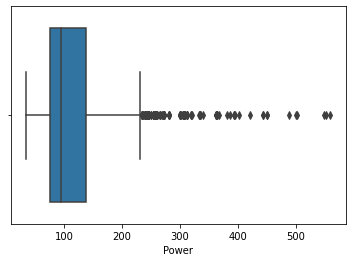

In [104]:
sns.boxplot(x=train['Power'])

In [105]:
train['Seats'].value_counts()

5.0     4890
7.0      672
8.0      133
4.0       99
6.0       29
2.0       13
10.0       4
9.0        3
Name: Seats, dtype: int64

In [106]:
train.shape

(5843, 13)

<b>So, in total I have 5843 Rows now to work forward. I droped 176 rows.</b>

In [107]:
train.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000
mean,2013.480404,57224.501284,18.365822,1622.600034,113.114819,5.285128,9.536024
std,3.163482,37773.045190,4.188521,598.772591,53.783427,0.806828,11.164542
min,1998.000000,171.000000,6.400000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,33490.500000,15.300000,1198.000000,75.000000,5.000000,3.515000
50%,2014.000000,52553.000000,18.330000,1495.000000,94.680000,5.000000,5.700000
75%,2016.000000,72405.500000,21.100000,1984.000000,138.100000,5.000000,10.000000
max,2019.000000,775000.000000,33.540000,5998.000000,560.000000,10.000000,160.000000


In [108]:
train.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Hyundai,i10Era,Jaipur,2013,46230,Petrol,Manual,First,19.81,1086.0,68.05,5.0,3.10
1,Toyota,Innova2.5G(Diesel)7SeaterBSIV,Pune,2009,118000,Diesel,Manual,First,12.80,2494.0,102.00,8.0,4.50
2,Skoda,LauraAmbiente,Hyderabad,2008,122397,Diesel,Manual,First,17.50,1896.0,106.00,5.0,4.40
3,Maruti,ErtigaVDI,Delhi,2014,79870,Diesel,Manual,First,20.77,1248.0,88.76,7.0,5.35
4,Hyundai,Verna1.6SX,Kolkata,2011,34994,Diesel,Manual,First,22.32,1582.0,126.32,5.0,3.90


#  EXPLORATORY DATA ANALYSIS

In [109]:
train.shape

(5843, 13)

In [110]:
train.dtypes

Brand                 object
Model                 object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [111]:
train.isnull().sum()

Brand                0
Model                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [112]:
print(train['Location'].unique())
print(train['Fuel_Type'].unique())
print(train['Transmission'].unique())
print(train['Owner_Type'].unique())
print(train['Year'].unique())

['Jaipur' 'Pune' 'Hyderabad' 'Delhi' 'Kolkata' 'Mumbai' 'Kochi'
 'Bangalore' 'Coimbatore' 'Ahmedabad' 'Chennai']
['Petrol' 'Diesel' 'CNG' 'LPG']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']
[2013 2009 2008 2014 2011 2012 2019 2006 2005 2015 2016 2017 2010 2018
 2007 2004 2002 2001 2003 2000 1998 1999]


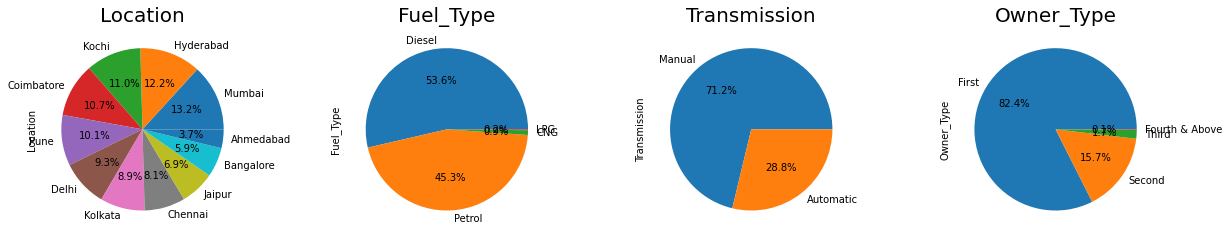

In [113]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)

plt.subplot(141)
plt.title('Location',fontsize=20)
train['Location'].value_counts().plot.pie(autopct="%1.1f%%")

plt.subplot(142)
plt.title('Fuel_Type',fontsize=20)
train['Fuel_Type'].value_counts().plot.pie(autopct='%1.1f%%')

plt.subplot(143)
plt.title('Transmission',fontsize=20)
train['Transmission'].value_counts().plot.pie(autopct='%1.1f%%')

plt.subplot(144)
plt.title('Owner_Type',fontsize=20)
train['Owner_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()


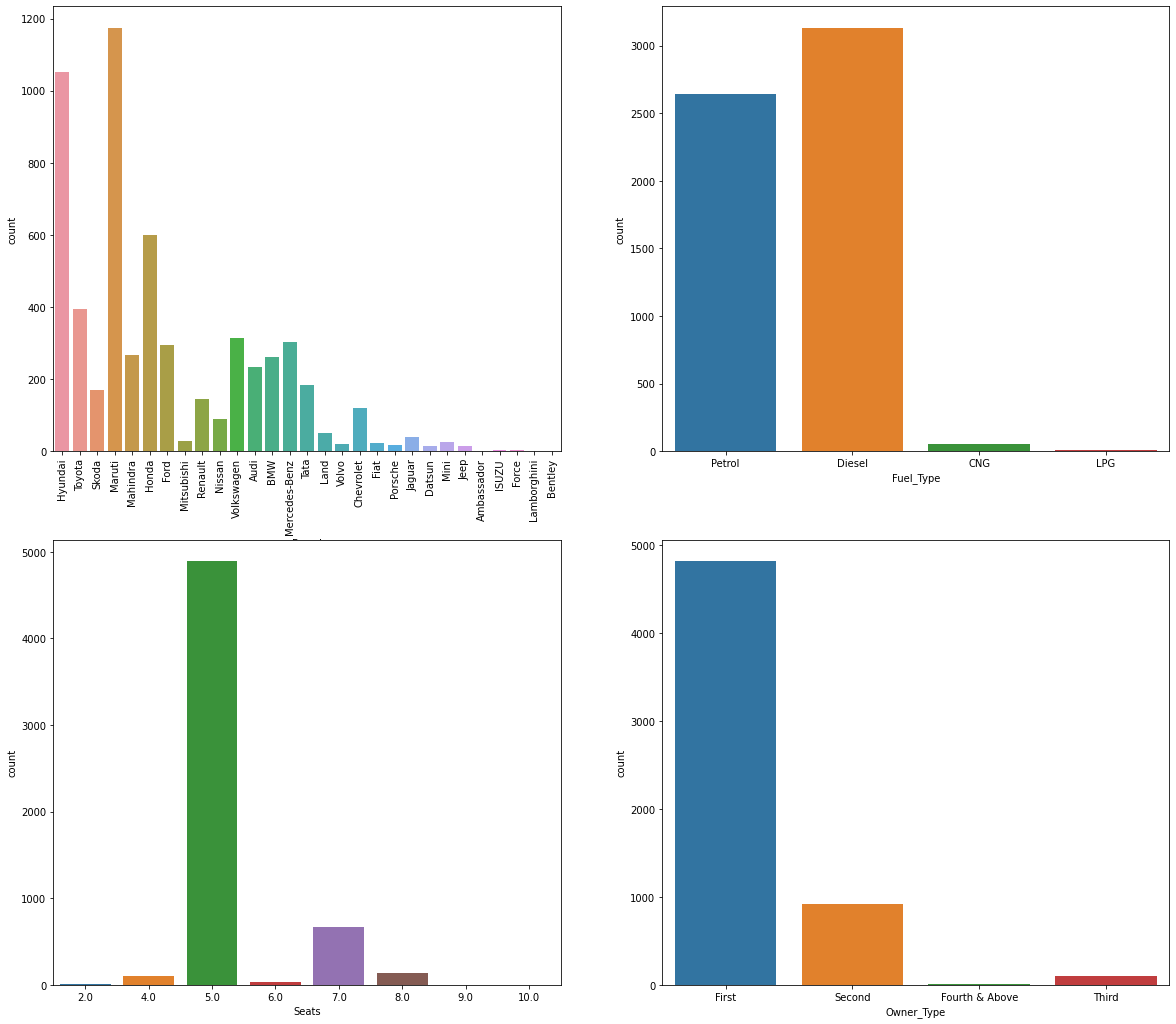

In [114]:
fig = plt.figure(figsize=(20,18))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.add_subplot(2,2,1)
g1 = sns.countplot(x='Brand', data=train)
loc,labels = plt.xticks()
g1.set_xticklabels(labels,rotation=90)
fig.add_subplot(2,2,2)
g2 = sns.countplot(x='Fuel_Type', data=train)
loc,labels = plt.xticks()
g2.set_xticklabels(labels,rotation=0)
fig.add_subplot(2,2,3)
g3 = sns.countplot(x='Seats', data=train)
loc,labels = plt.xticks()
g3.set_xticklabels(labels,rotation=0)
fig.add_subplot(2,2,4)
g4 = sns.countplot(x='Owner_Type', data=train)
loc,labels = plt.xticks()
g4.set_xticklabels(labels,rotation=0)
plt.show()

<b>INFERENCES</b>

1. Most cars have manual transmission.
2. Most owners of the car are first.
3. CNG and LPG are not much popular in India.
4. Hyundai and Maruti are the most loved cars in India.
5. First-hand cars are maximum followed by second-hand cars.
6. Cars with 5 seats are dominant.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


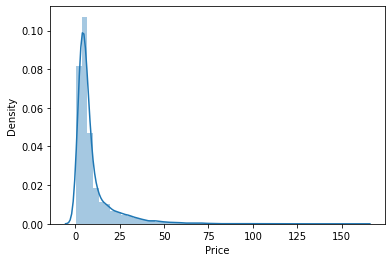

In [120]:
sns.distplot(train['Price'])

Most of the cars have prices between 0 to 25 lakhs

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


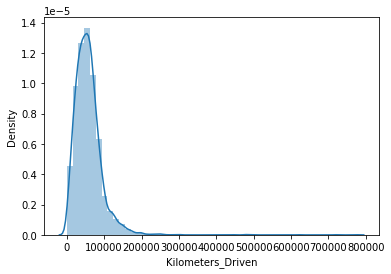

In [121]:
sns.distplot(train['Kilometers_Driven'])

In [122]:
train['Price'].describe()

count    5843.000000
mean        9.536024
std        11.164542
min         0.440000
25%         3.515000
50%         5.700000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

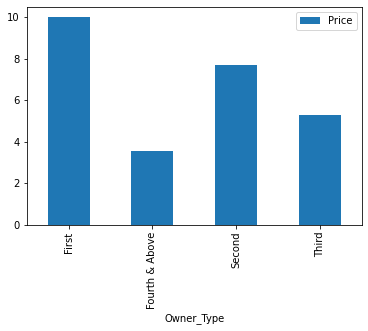

In [123]:
df_vis_1 = pd.DataFrame(train.groupby('Owner_Type')['Price'].mean())
df_vis_1.plot.bar()

Prices decreases progressively as ownership level increases i.e. from firsthand to seconhand and so on.

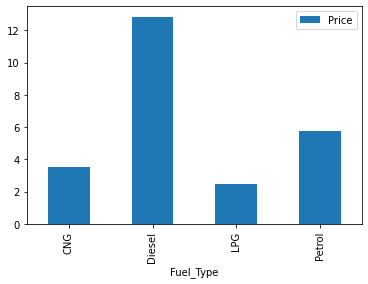

In [124]:
df_vis_1 = pd.DataFrame(train.groupby('Fuel_Type')['Price'].mean())
df_vis_1.plot.bar()

Diesel cars are costly.

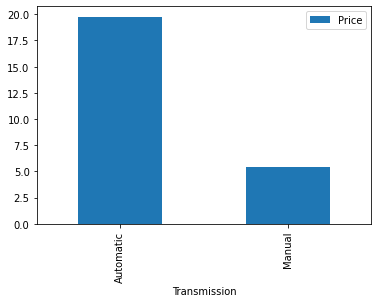

In [125]:
df_vis_1 = pd.DataFrame(train.groupby('Transmission')['Price'].mean())
df_vis_1.plot.bar()

Automatic cars are costly as compared to manual cars

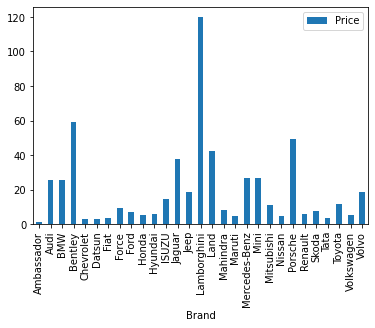

In [126]:
df_vis_2 = pd.DataFrame(train.groupby('Brand')['Price'].mean())
df_vis_2.plot.bar()

Lamborghini is the most expensive car in the data frame.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


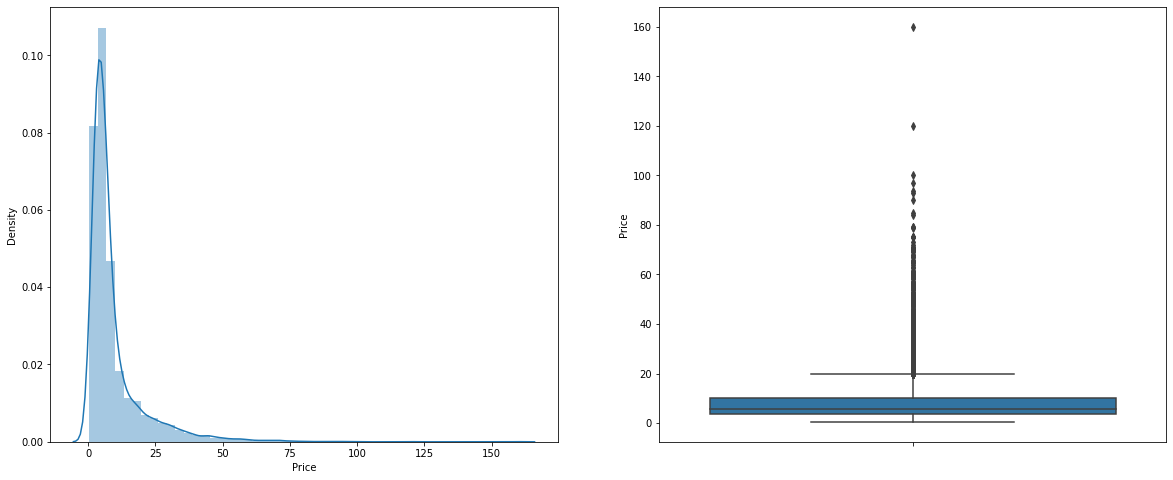

In [127]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(train['Price'])

plt.subplot(1,2,2)
sns.boxplot(y=train['Price'])
plt.show()

Price column squweed in right, so label is not properly distributed

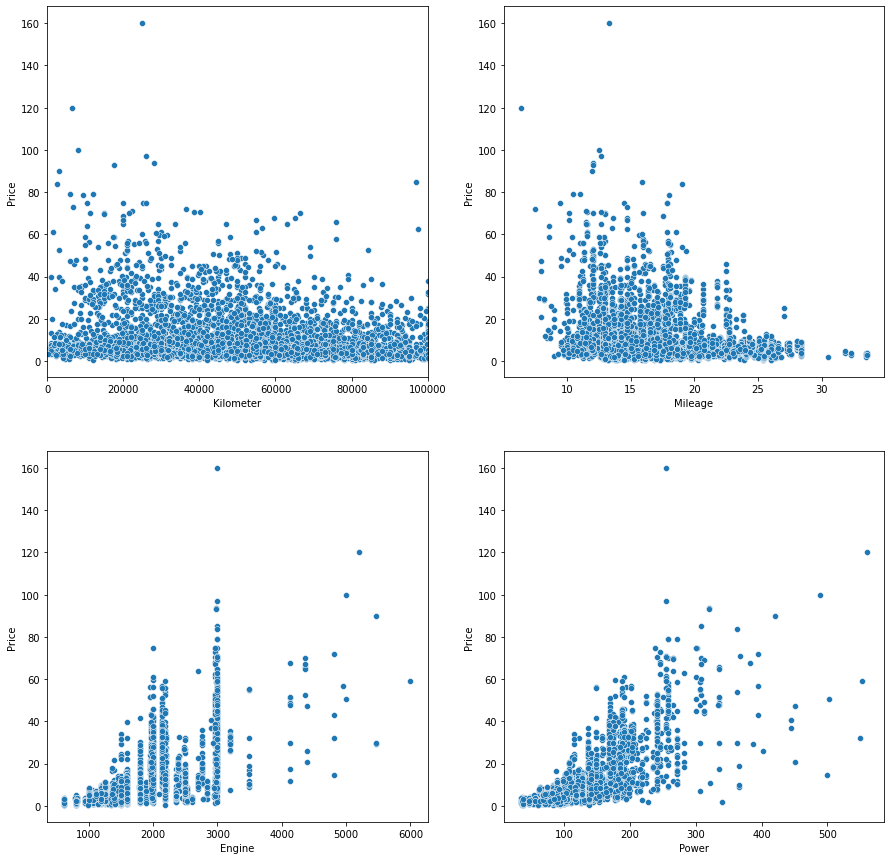

In [128]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
ax1 = fig.add_subplot(2,2,1)
plt.xlim([0, 100000])
p1 = sns.scatterplot(x="Kilometers_Driven", y="Price", data=train)
loc, labels = plt.xticks()
ax1.set_xlabel('Kilometer')

ax2 = fig.add_subplot(2,2,2)
p2 = sns.scatterplot(x="Mileage", y="Price", data=train)
loc, labels = plt.xticks()
ax2.set_xlabel('Mileage')

ax3 = fig.add_subplot(2,2,3)
p3 = sns.scatterplot(x="Engine", y="Price", data=train)
loc, labels = plt.xticks()
ax3.set_xlabel('Engine')

ax4 = fig.add_subplot(2,2,4)
p4 = sns.scatterplot(x="Power", y="Price", data=train)
loc, labels = plt.xticks()
ax4.set_xlabel('Power')

plt.show()

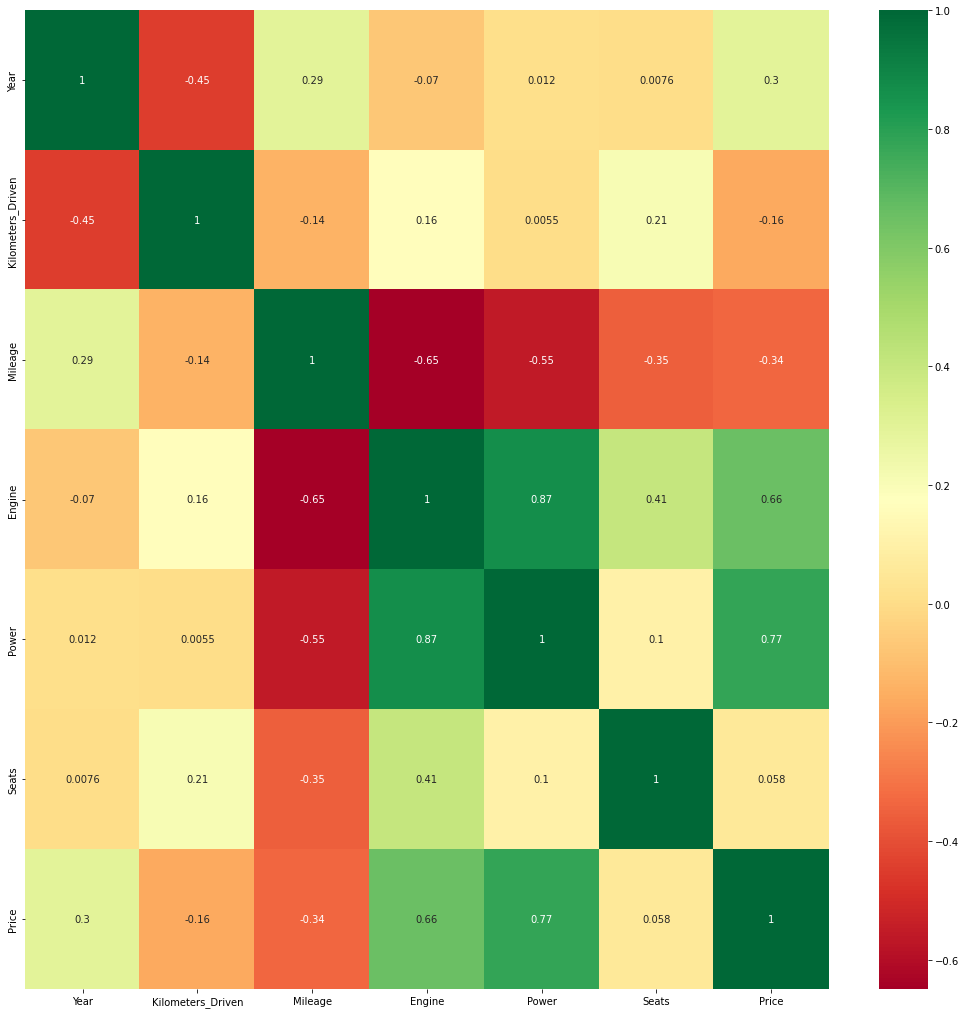

In [129]:
plt.figure(figsize=(18,18))
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [130]:
train.corr() # Correlation coefficients .

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.445609,0.294795,-0.069886,0.012099,0.007555,0.297335
Kilometers_Driven,-0.445609,1.000000,-0.139367,0.162784,0.005479,0.213492,-0.162226
Mileage,0.294795,-0.139367,1.000000,-0.649155,-0.553994,-0.353987,-0.337159
Engine,-0.069886,0.162784,-0.649155,1.000000,0.866675,0.406018,0.657067
Power,0.012099,0.005479,-0.553994,0.866675,1.000000,0.102994,0.774773
Seats,0.007555,0.213492,-0.353987,0.406018,0.102994,1.000000,0.058275
Price,0.297335,-0.162226,-0.337159,0.657067,0.774773,0.058275,1.000000


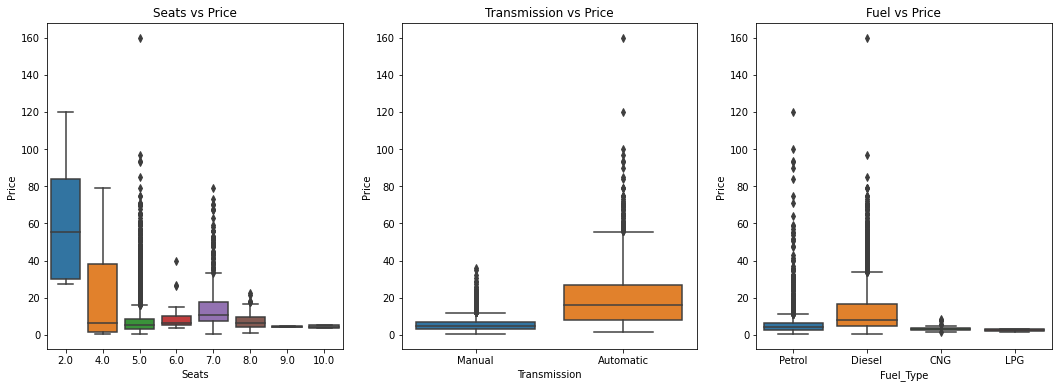

In [131]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1,3,1)
sns.boxplot(x='Seats', y='Price', data=train)
ax1.set_title('Seats vs Price')

ax2 = fig.add_subplot(1,3,2)
sns.boxplot(x='Transmission', y='Price', data=train)
ax2.set_title('Transmission vs Price')

ax3 = fig.add_subplot(1,3,3)
sns.boxplot(x='Fuel_Type', y='Price', data=train)
ax3.set_title('Fuel vs Price')

plt.show()


<b>INFERENCES</b>

1. Two seater car are expensive.
2. Automatic car are expensive.
3. Diesel cars are relatively expensive.

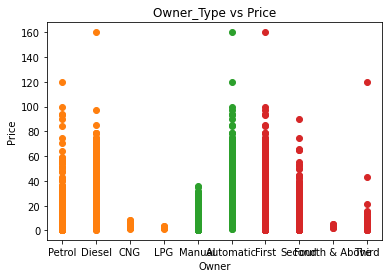

In [132]:
#year vs price
plt.title("Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.scatter(train.Year,train.Price)
#fuel type vs price
plt.title("Fuel_Type vs Price")
plt.xlabel("Fuel_Type")
plt.ylabel("Price")
plt.scatter(train.Fuel_Type,train.Price)
#transmission vs price
plt.title("Transmission vs Price")
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.scatter(train.Transmission,train.Price)
#owner type vs price
plt.title("Owner_Type vs Price")
plt.xlabel("Owner")
plt.ylabel("Price")
plt.scatter(train.Owner_Type,train.Price)
plt.show()

## LABEL ENCODING AND ONE HOT ENCODING 

In [133]:
print(train['Location'].unique())
print(train['Fuel_Type'].unique())
print(train['Transmission'].unique())
print(train['Owner_Type'].unique())
print(train['Year'].unique())
print(train['Brand'].unique())

['Jaipur' 'Pune' 'Hyderabad' 'Delhi' 'Kolkata' 'Mumbai' 'Kochi'
 'Bangalore' 'Coimbatore' 'Ahmedabad' 'Chennai']
['Petrol' 'Diesel' 'CNG' 'LPG']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']
[2013 2009 2008 2014 2011 2012 2019 2006 2005 2015 2016 2017 2010 2018
 2007 2004 2002 2001 2003 2000 1998 1999]
['Hyundai' 'Toyota' 'Skoda' 'Maruti' 'Mahindra' 'Honda' 'Ford'
 'Mitsubishi' 'Renault' 'Nissan' 'Volkswagen' 'Audi' 'BMW' 'Mercedes-Benz'
 'Tata' 'Land' 'Volvo' 'Chevrolet' 'Fiat' 'Porsche' 'Jaguar' 'Datsun'
 'Mini' 'Jeep' 'Ambassador' 'ISUZU' 'Force' 'Lamborghini' 'Bentley']


In [134]:
train['Brand'].value_counts()

Maruti           1175
Hyundai          1051
Honda             600
Toyota            394
Volkswagen        314
Mercedes-Benz     304
Ford              294
Mahindra          268
BMW               261
Audi              234
Tata              183
Skoda             170
Renault           145
Chevrolet         120
Nissan             89
Land               51
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               3
Lamborghini         1
Ambassador          1
Bentley             1
Name: Brand, dtype: int64

In [135]:
train_df = pd.DataFrame(train.groupby('Brand')['Price'].mean())
train_df=train_df.sort_values(by=['Price'])
train_df.reset_index(inplace=True)
print(train_df)

            Brand       Price
0      Ambassador    1.350000
1          Datsun    3.049231
2       Chevrolet    3.057333
3            Fiat    3.570435
4            Tata    3.605574
5          Maruti    4.554868
6          Nissan    4.784719
7      Volkswagen    5.306815
8           Honda    5.424167
9         Hyundai    5.537831
10        Renault    5.799034
11           Ford    6.957721
12          Skoda    7.612471
13       Mahindra    8.058955
14          Force    9.333333
15     Mitsubishi   11.058889
16         Toyota   11.907970
17          ISUZU   14.696667
18           Jeep   18.718667
19          Volvo   18.802857
20            BMW   25.288046
21           Audi   25.559402
22  Mercedes-Benz   26.483783
23           Mini   26.896923
24         Jaguar   37.632250
25           Land   42.526078
26        Porsche   49.204375
27        Bentley   59.000000
28    Lamborghini  120.000000


<b>Converting catagorical variables like Owner_Type and Brand into numerical variables.</b>

In [136]:
train.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)

<b>Numbers have been assigned to brands in such a manner that brand which have higher mean prices got higher number. For 
eg Lamborghini have highest mean price so got the largest number.</b>

In [137]:
train.replace({'Ambassador':1,'Datsun':2, 'Chevrolet':3, 'Fiat':4, 'Tata':5, 'Maruti':6, 'Nissan':7, 'Volkswagen':8, 
                'Honda':9, 'Hyundai':10, 'Renault':11, 'Ford':12, 'Skoda':13, 'Mahindra':14, 'Force':15, 'Mitsubishi':16, 'Toyota':17, 
                'ISUZU':18, 'Jeep':19, 'Volvo':20, 'BMW':21, 'Audi':22, 'Mercedes-Benz':23, 'Mini':24, 'Jaguar':25, 'Land':26, 'Porsche':26,
                'Bentley':27, 'Lamborghini':28},inplace=True)

<b>Doing one hot encoding for Fuel_Type and Transmission using get_dummies</b>

In [138]:
var = 'Fuel_Type'
Fuel_Type = train[[var]]
Fuel_Type = pd.get_dummies(Fuel_Type,drop_first=False)

var = 'Transmission'
Transmission = train[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=False)
train= pd.concat([train,Transmission,Fuel_Type],axis=1)

<b>Removing redundant and less important columns.</b>

In [139]:
train.drop(['Transmission','Transmission_Manual','Model','Fuel_Type_Diesel','Fuel_Type','Location'], axis=1, inplace=True)

<b>Replacing year of manufacture by age of the car</b>

In [140]:
curr_time = datetime.datetime.now()
train['Year'] = train['Year'].apply(lambda x : curr_time.year - x)

<b>Reordering the columns</b>

In [141]:
train = train[['Brand', 'Year','Kilometers_Driven', 'Fuel_Type_CNG', 'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Automatic',
      'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]

In [142]:
train.head()

,Brand,Year,Kilometers_Driven,Fuel_Type_CNG,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Owner_Type,Mileage,Engine,Power,Seats,Price
0,10,9,46230,0,0,1,0,1,19.81,1086.0,68.05,5.0,3.10
1,17,13,118000,0,0,0,0,1,12.80,2494.0,102.00,8.0,4.50
2,13,14,122397,0,0,0,0,1,17.50,1896.0,106.00,5.0,4.40
3,6,8,79870,0,0,0,0,1,20.77,1248.0,88.76,7.0,5.35
4,10,11,34994,0,0,0,0,1,22.32,1582.0,126.32,5.0,3.90


<b>Correlation Matrix</b>

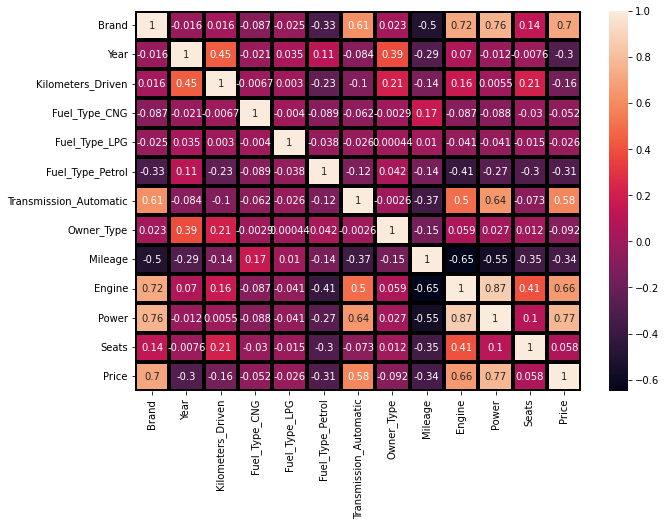

In [143]:
corrMatrix = train.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True, linewidths=3, linecolor='black')
plt.show()

1. Engine, power, price, brand are highly correlated to each other.
2. A branded company have costly car with a good engine, power, price, brand.

In [144]:
train.dtypes

Brand                       int64
Year                        int64
Kilometers_Driven           int64
Fuel_Type_CNG               uint8
Fuel_Type_LPG               uint8
Fuel_Type_Petrol            uint8
Transmission_Automatic      uint8
Owner_Type                  int64
Mileage                   float64
Engine                    float64
Power                     float64
Seats                     float64
Price                     float64
dtype: object

<b>All variables are converted to either float or integer as Machine learning alorithms works with a numeric value.</b>

In [145]:
X = train.loc[:,['Brand', 'Year','Kilometers_Driven', 'Fuel_Type_CNG', 'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Automatic',
      'Owner_Type', 'Power', 'Seats']]
print(X.shape)
y = train.loc[:,['Price']]

(5843, 10)


<b>Plotting graph of feature importances for better visualization</b>

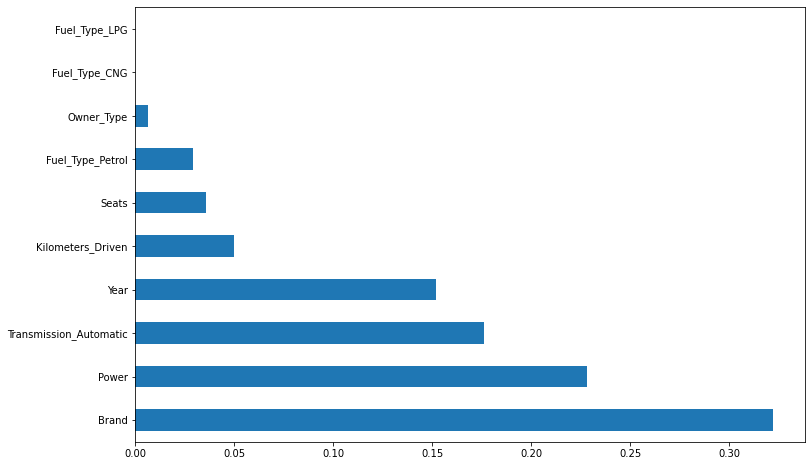

In [146]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,y.values.ravel())
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

<b>Train test split</b>

In [147]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3,random_state=25)

In [148]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4090, 10) (1753, 10) (4090, 1) (1753, 1)


<b>Scaling the dataframe</b>

In [149]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# APPLYING DIFFERENT MACHINE LEARNING ALGORITHMS

## 1. Linear Regression 

In [150]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1= model1.predict(X_test)
print("Accuracy on Traing set: ",model1.score(X_train,y_train)*100,'%')
print("Accuracy on Testing set: ",model1.score(X_test,y_test)*100,'%')

Accuracy on Traing set:  71.38554434410655 %
Accuracy on Testing set:  74.3303794972467 %


In [151]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print("R2 score : %f" % r2_score(y_test,y_pred1))

Mean Absolute Error: 3.5137116798463466
Mean Squared Error: 31.64330775840971
Root Mean Squared Error: 5.625238462359592
R2 score : 0.743304


In [152]:
test_values=list(list(model1.coef_)[0])
test_keys=list(X.columns)
res={}
for key in test_keys:
    for value in test_values:
        res[key]=value
        test_values.remove(value)
        break
print(res)

{'Brand': 2.6831230402229425, 'Year': -2.703739837515019, 'Kilometers_Driven': -0.7835582650739555, 'Fuel_Type_CNG': 0.01715934209389358, 'Fuel_Type_LPG': 0.1120605507833298, 'Fuel_Type_Petrol': -0.85456280952419, 'Transmission_Automatic': 0.503125469143503, 'Owner_Type': 0.019246572279199486, 'Power': 6.021117632199607, 'Seats': -0.3245618483265229}


In [153]:
print(model1.intercept_)

[9.57429095]


Text(0, 0.5, 'Actual Price of the Car')

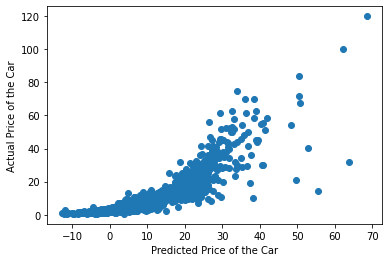

In [154]:
plt.scatter(y_pred1,y_test)
plt.xlabel('Predicted Price of the Car')
plt.ylabel('Actual Price of the Car')

## 2. Random Forest Regressor

In [157]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(X_train, y_train.values.ravel())
y_pred= model2.predict(X_test)
print("Accuracy on Traing set: ",model2.score(X_train,y_train))
print("Accuracy on Testing set: ",model2.score(X_test,y_test))

Accuracy on Traing set:  0.9830529852048637
Accuracy on Testing set:  0.8709829108576993


In [160]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print("R2 score : %f" % r2_score(y_test,y_pred1))

Mean Absolute Error: 3.5137116798463466
Mean Squared Error: 31.64330775840971
Root Mean Squared Error: 5.625238462359592
R2 score : 0.743304


Text(0, 0.5, 'Actual Price of the Car')

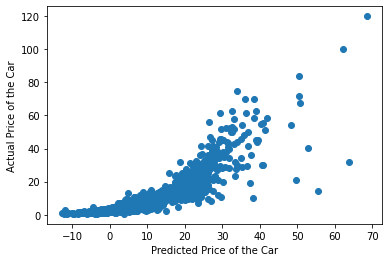

In [162]:
plt.scatter(y_pred1,y_test,)
plt.xlabel('Predicted Price of the Car')
plt.ylabel('Actual Price of the Car')

## 3. XGBoost Regressor

In [166]:
from xgboost import XGBRegressor

model3 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
model3.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)
y_pred3 = model3.predict(X_test)
print("Accuracy on Traing set: ",model3.score(X_train,y_train)*100,'%')
print("Accuracy on Testing set: ",model3.score(X_test,y_test)*100,'%')

[07:36:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy on Traing set:  92.8452490328429 %
Accuracy on Testing set:  88.88495493565645 %


In [167]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
print("R2 score : %f" % r2_score(y_test,y_pred3))

Mean Absolute Error: 1.7737600136129636
Mean Squared Error: 13.701674774735801
Root Mean Squared Error: 3.7015773360468645
R2 score : 0.888850


Text(0, 0.5, 'Actual Price of the Car')

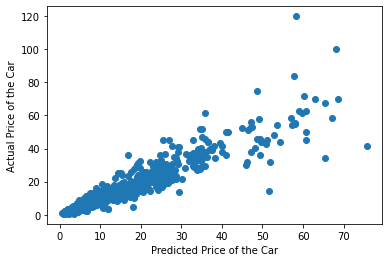

In [168]:
plt.scatter(y_pred3,y_test,)
plt.xlabel('Predicted Price of the Car')
plt.ylabel('Actual Price of the Car')

## 4. Ridge Regressor

In [177]:
# find optimal alpha with grid search
from sklearn.linear_model import Ridge 
from sklearn.model_selection import GridSearchCV
model4 = Ridge(alpha=1).fit(X_train, y_train)
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
model4 = GridSearchCV(estimator=model4, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = model4.fit(X_train, y_train)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Params:  {'alpha': 10}


In [178]:
model4 = Ridge(alpha=10.0)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print("Accuracy on Traing set: ",model4.score(X_train,y_train)*100,'%')
print("Accuracy on Testing set: ",model4.score(X_test,y_test)*100,'%')

Accuracy on Traing set:  71.38519446429902 %
Accuracy on Testing set:  74.33692888781486 %


In [179]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred4))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))
print("R2 score : %f" % r2_score(y_test,y_pred4))

Mean Absolute Error: 3.509627998174471
Mean Squared Error: 31.635234231130394
Root Mean Squared Error: 5.624520800133145
R2 score : 0.743369


In [180]:
test_values=list(list(model4.coef_)[0])
test_keys=list(X.columns)
res={}
for key in test_keys:
    for value in test_values:
        res[key]=value
        test_values.remove(value)
        break
print(res)

{'Brand': 2.688535554327057, 'Year': -2.6939279986685984, 'Kilometers_Driven': -0.7851081825439566, 'Fuel_Type_CNG': 0.016174860081513476, 'Fuel_Type_LPG': 0.11051887112175102, 'Fuel_Type_Petrol': -0.8574444657159767, 'Transmission_Automatic': 0.5180851976818082, 'Owner_Type': 0.01625261668582786, 'Power': 5.991551659205747, 'Seats': -0.3203778116283315}


Text(0, 0.5, 'Actual Price of the Car')

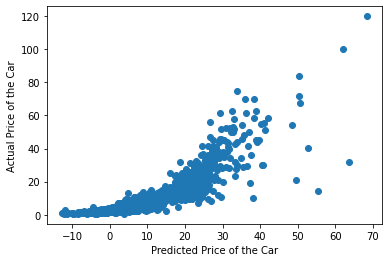

In [181]:
plt.scatter(y_pred4,y_test,)
plt.xlabel('Predicted Price of the Car')
plt.ylabel('Actual Price of the Car')

## 5. Lasso Regressor

In [182]:
from sklearn.linear_model import Lasso
model5 = Lasso(alpha=1).fit(X_train, y_train)
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

model5 = GridSearchCV(estimator=model5, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = model5.fit(X_train, y_train)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Params:  {'alpha': 0.01}


In [183]:
model5 = Lasso(alpha=0.01)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print("Accuracy on Traing set: ",model5.score(X_train,y_train)*100,'%')
print("Accuracy on Testing set: ",model5.score(X_test,y_test)*100,'%')

Accuracy on Traing set:  71.38482032924715 %
Accuracy on Testing set:  74.3311218100348 %


In [184]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred5))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))
print("R2 score : %f" % r2_score(y_test,y_pred5))

Mean Absolute Error: 3.510746692135595
Mean Squared Error: 31.642392698835508
Root Mean Squared Error: 5.625157126590821
R2 score : 0.743311


In [185]:
#list(list(model5.coef_)[0])

test_values=list(model5.coef_)
test_keys=list(X.columns)
res={}
for key in test_keys:
    for value in test_values:
        res[key]=value
        test_values.remove(value)
        break
print(res)

{'Brand': 2.6795594564508733, 'Year': -2.6920859989659327, 'Kilometers_Driven': -0.7750982958961207, 'Fuel_Type_CNG': 0.00810943758662411, 'Fuel_Type_LPG': 0.10186022522073426, 'Fuel_Type_Petrol': -0.843255473887825, 'Transmission_Automatic': 0.5021214960548573, 'Owner_Type': 0.002233898131413828, 'Power': 6.0153303547431625, 'Seats': -0.3120186278377462}


Text(0, 0.5, 'Actual Price of the Car')

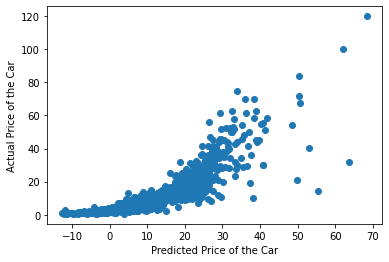

In [186]:
plt.scatter(y_pred5,y_test,)
plt.xlabel('Predicted Price of the Car')
plt.ylabel('Actual Price of the Car')

## XGBoost Regressor has the best performance(according to R2 values) among the regressors chosen. 